In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install pandas-profiling

ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.


  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107421 sha256=1141d43702929090c3eba725da876468b0b60a9fbd2542104668fd7889028474
  Stored in directory: c:\users\saleh\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=45884de8c5f1f67f2351da2629e7ff0362e35636950c168bfa801e3f68b1356a
  Stored in directory: c:\users\saleh\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0


In [4]:
from pandas_profiling.profile_report import ProfileReport

In [5]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [6]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [7]:
pd_report=ProfileReport(df)

In [8]:
pd_report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.select_dtypes("object")

gender ever_married      work_type Residence_type   smoking_status
0       Male          Yes        Private          Urban  formerly smoked
1     Female          Yes  Self-employed          Rural     never smoked
2       Male          Yes        Private          Rural     never smoked
3     Female          Yes        Private          Urban           smokes
4     Female          Yes  Self-employed          Rural     never smoked
...      ...          ...            ...            ...              ...
5105  Female          Yes        Private          Urban     never smoked
5106  Female          Yes  Self-employed          Urban     never smoked
5107  Female          Yes  Self-employed          Rural     never smoked
5108    Male          Yes        Private          Rural  formerly smoked
5109  Female          Yes       Govt_job          Urban          Unknown

[5110 rows x 5 columns]

In [11]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [12]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df["bmi"].mode()

0    28.7
dtype: float64

In [14]:
df["bmi"].median()

28.1

In [15]:
df["bmi"].mean()

28.893236911794673

In [16]:
df["bmi"].fillna(df["bmi"].median(),inplace=True)

In [19]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
list(df.select_dtypes("object"))

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [23]:
for i in list(df.select_dtypes("object")):
    print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [26]:
gender={'Male':0,'Female':1, 'Other':3}
ever_married={'Yes':0, 'No':1}
work_type={'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
Residence_type={'Urban':0, 'Rural':1}
smoking_status={'formerly smoked':0, 'never smoked':1, 'smokes':3, 'Unknown':4}

In [27]:
df["gender"]=df["gender"].replace(gender)
df["ever_married"]=df["ever_married"].replace(ever_married)
df["work_type"]=df["work_type"].replace(work_type)
df["Residence_type"]=df["Residence_type"].replace(Residence_type)
df["smoking_status"]=df["smoking_status"].replace(smoking_status)


In [30]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [31]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       0  67.0             0              1             0          0   
1  51676       1  61.0             0              0             0          1   
2  31112       0  80.0             0              1             0          0   
3  60182       1  49.0             0              0             0          0   
4   1665       1  79.0             1              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               0       1  
1               1             202.21  28.1               1       1  
2               1             105.92  32.5               1       1  
3               0             171.23  34.4               3       1  
4               1             174.12  24.0               1       1

In [34]:
for i in df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]:
    print(df[i].unique())

[0 1 3]
[0 1]
[0 1 2 3 4]
[0 1]
[0 1 3 4]


In [36]:
X=df.drop("stroke",axis=1)
y=df["stroke"]

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=322)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model=DecisionTreeClassifier()

In [40]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
model.score(x_test,y_test)

0.9100156494522692

In [42]:
model.predict([[9046,0,67.0,0,1,0,0,0,228.69,36.6,0]])

array([1], dtype=int64)

In [43]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from six import StringIO
from IPython.display import Image
import pydotplus

In [45]:
f_name=list(X.columns)
class_name=list(y.unique())
f_name,class_name

(['id',
  'gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status'],
 [1, 0])

In [46]:
scaler=StandardScaler()

In [47]:
x_transform=scaler.fit_transform(X)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.25,random_state=322)

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca=PCA()

In [52]:
p_comp=pca.fit_transform(x_transform)

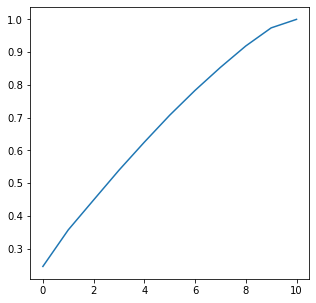

In [54]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [55]:
pca=PCA(n_components=10)

In [56]:
new_val=pca.fit_transform(x_transform)

In [57]:
p_x=pd.DataFrame(new_val,columns=["pc_"+str(i) for i in range(1,11)])

In [58]:
p_x

pc_1      pc_2      pc_3      pc_4      pc_5      pc_6      pc_7  \
0     3.166030  3.300098  1.505876  0.372832 -1.229889 -1.515277 -1.715419   
1     1.257008  0.172075 -1.144602  0.022118  1.061196 -0.346237 -1.397328   
2     2.471928  2.261111 -0.590044  0.474306 -2.076033 -2.540161  0.070262   
3     1.042657 -0.308976  0.315525 -1.355584  0.816210  0.171760 -1.669085   
4     2.097534  1.204667  0.059718  2.110860  2.410602  0.249828  1.364894   
...        ...       ...       ...       ...       ...       ...       ...   
5105  2.218452 -0.073802  1.319611  0.356332  1.625573  0.322182  2.407698   
5106  1.877101 -0.750173  0.751464 -0.777450  0.447200  0.065393 -0.658345   
5107  0.179332 -1.053863 -0.350538  1.241035  0.081014 -0.422052  0.127492   
5108  1.230668  0.459962 -1.057336  0.426078 -0.900682  0.487415 -0.447872   
5109 -0.775927 -0.302342  0.842178 -0.837258  0.548702 -0.531094 -0.089261   

          pc_8      pc_9     pc_10  
0    -1.210897  1.462662  0.112651  
1    -1.010678 -1.170463  0.140608  
2     0.217232  1.328782  0.362213  
3     0.503210 -0.362567 -0.388281  
4    -0.460556 -1.115141 -0.572872  
...        ...       ...       ...  
5105  0.380227 -0.154728 -0.721205  
5106 -0.020294 -0.205663  1.157456  
5107 -0.237332 -0.094930  0.675979  
5108 -1.451675 -0.810329 -0.571655  
5109  1.100673 -1.026604  0.714038  

[5110 rows x 10 columns]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(p_x,y,test_size=0.25,random_state=322)

In [60]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
model2.score(x_test,y_test)

0.917057902973396

In [62]:
depth=np.arange(1,100)
leaves=[1,2,10,20,30,40,80,100]
g_s_p={
    'criterion': ['gini', 'entropy'],
    'max_depth':depth,
    'min_samples_leaf':leaves,
    'splitter': ['best', 'random']
}

In [63]:
grid_serach=GridSearchCV(estimator=model2,param_grid=g_s_p,cv=5,n_jobs=-1)

In [64]:
grid_serach.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'min_samples_leaf': [1, 2, 10, 20, 30, 40, 80, 100],
                         'splitter': ['best', 'random']})

In [65]:
grid_serach.best_params_

{'criterion': 'gini',
 'max_depth': 63,
 'min_samples_leaf': 10,
 'splitter': 'random'}

In [66]:
grid_serach.best_score_

0.9527667049063695

In [67]:
model_cv=DecisionTreeClassifier(criterion="gini",max_depth=63,min_samples_leaf=10,splitter="random")

In [68]:
model_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=63, min_samples_leaf=10, splitter='random')

In [69]:
model_cv.score(x_test,y_test)

0.9475743348982786

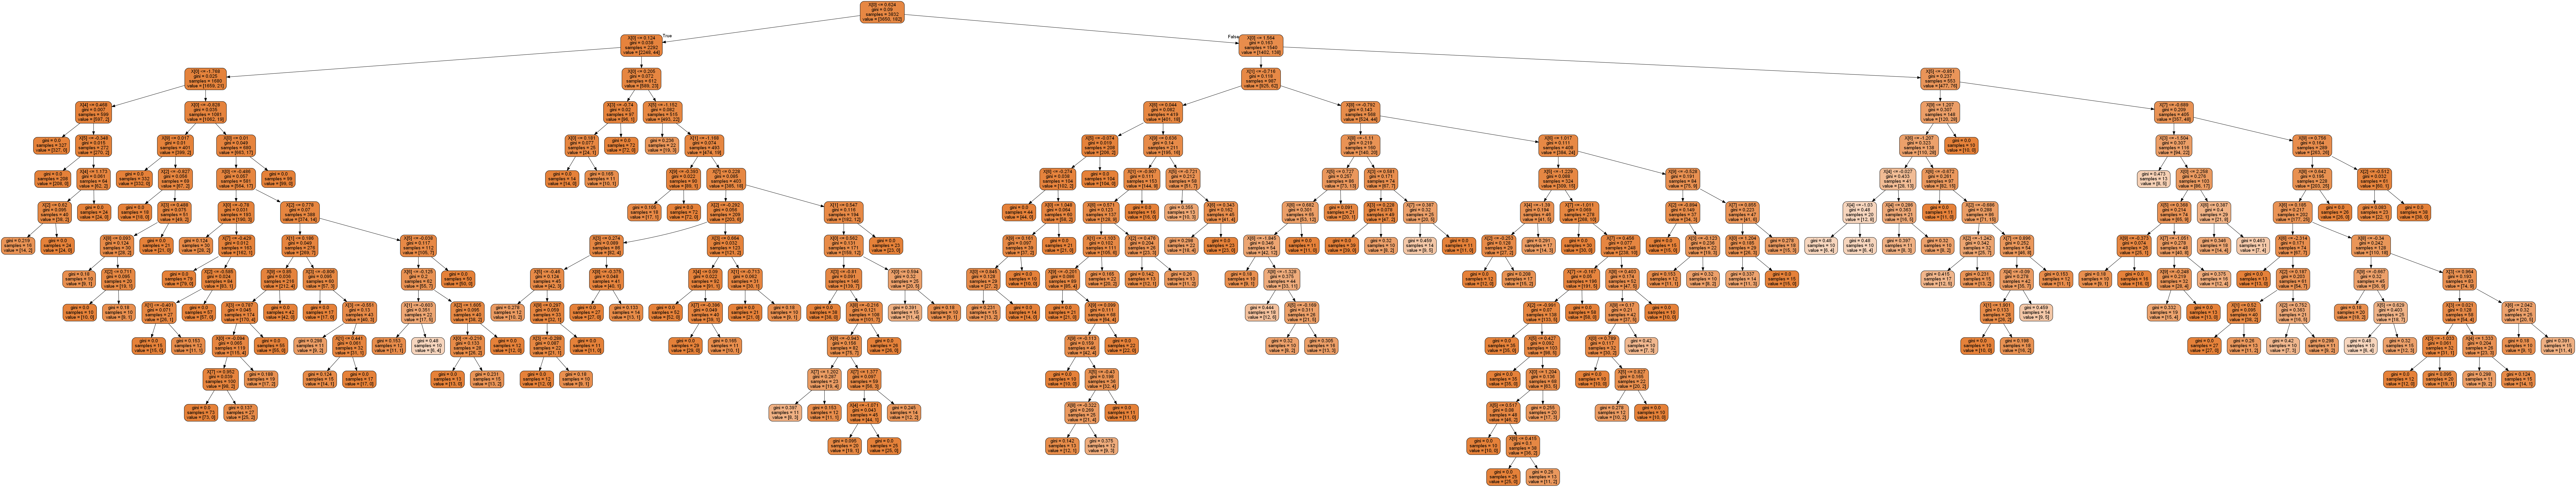

In [70]:
dot_data=export_graphviz(model_cv,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('stroke.png')
Image(graph.create_png())

In [72]:
model_cv.predict([[0,67.0,0,1,0,0,0,228.69,36.6,0]])

array([0], dtype=int64)

In [75]:
import pickle

In [76]:
file_name="stroke.pkl"
pickle.dump(model_cv,open(file_name,'wb'))

In [77]:
test_model=pickle.load(open(file_name,'rb'))

In [78]:
test_model.predict([[0,67.0,0,1,1,0,0,228.69,36.600000,1]])                            

array([0], dtype=int64)